## Diffusion und numerische Ableitungen

Um nochmal auf die numerische Implementierung der Diffusionsgleichung zu erklären, hier nochmal eine Schritt für Schritt Erklärung.
Fangen wir an mit der Diffusionsgleichung (erstmal in 1D) an sich:
\begin{align}
    \frac{\partial u(x, t)}{\partial t} = a \frac{\partial^2 u(x, t)}{\partial x^2}
\end{align}
mit einer Funktion $u(x, t)$ und der Diffusionskonstanten $a$.

Wenn wir das nun numerisch ausrechnen wollen, müssen wir immer kleine Zeitschritte berechnen:
\begin{align}
    u(x, t + \Delta t) = u(x, t) + \frac{\partial u(x, t)}{\partial t} \cdot \Delta t
\end{align}
Die Ableitung nach der Zeit ist nach der Diffusionsgleichung vorgegeben, also müssen wir hier die 2te Ableitung numerisch berechnen.

Das tun wir an jedem Punkt in unserem array $a_i$, indem wir folgendes berechnen:
\begin{align}
    \frac{\Delta^2 a_i}{\Delta x^2} = \frac{a_{i-1} - 2 a_i + a_{i+1}}{\Delta x^2}
\end{align}

Das wollen wir jetzt mit _numpy.roll_ machen.

###  Berechnung der 2ten Ableitung in 1D

Wir berechnen die Werte $a_{i-1}$ und $a_{i+1}$ mithilfe von np.roll. Dabei wird das Array jeweils um ein Index verschoben.

![title](tikzpictures/roll.png)

Das können wir folgendermaßen implementieren (mit der Annahme, dass $\Delta x = 1$.
Vorsicht: roll ist periodisch, dass heißt der letzte Index wird der erste, also Vorsicht am Rand!

In [62]:
def second_derivative(a, dx=1):
    return (np.roll(a, -1) - 2 * a + np.roll(a, 1)) / dx**2

Das probieren wir mal aus mit der Funktion
\begin{align}
    f(x) = 2 x^3\\
    f'(x) = 6 x^2\\
    f''(x) = 12 x
\end{align}

In [63]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10) # dx = 1
fx = 2 * x**3
diff2_fx = 12 * x
diff2_numerically = second_derivative(fx)

# Wertevergleich
print(diff2_fx)
print(diff2_numerically)

# Test: sind sie gleich?
print("Wo sind sie gleich?")
print(diff2_fx == diff2_numerically)

[  0  12  24  36  48  60  72  84  96 108]
[ 1460.    12.    24.    36.    48.    60.    72.    84.    96. -1892.]
Wo sind sie gleich?
[False  True  True  True  True  True  True  True  True False]


Funktioniert also, bis auf die Ränder.

### Jetzt nochmal zurück zum Hexagonalfeld der Schneeflocke

Jetzt wollen wir das in das Hexagonalfeld der Schneeflocke übertragen. Dafür müssen wir das, was wir oben in 1D gemacht haben auf das Hexagonalfeld übertragen.

Schreiben sie also eine Funktion, die die zweite Ableitung auf dem Hexagonalfeld errechnet.

In [67]:
def second_derivative_hexagonal(a, dx=1):
    """
    Args:
        a : np.array with 2 dimensions
    """
    # Directions of neighbours in the hexagonal grid
    dcell = [[-1, -1], [0, -1], [-1, 0], [1, 0], [0, 1], [1, 1]]
    return np.zeros((4, 4))

Hier könnt ihr eure Funktion testen.

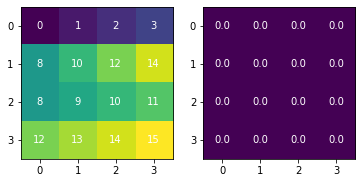

In [68]:
test = np.arange(16).reshape(4, 4)
test[1] *= 2
test_diff2 = second_derivative_hexagonal(test)

fig, ax = plt.subplots(1, 2)

for i, arr in enumerate([test, test_diff2]):
    im = ax[i].imshow(arr)
    # Loop over data dimensions and create text annotations.
    for j in range(4):
        for k in range(4):
            text = ax[i].text(k, j, arr[j, k],
                           ha="center", va="center", color="w")
plt.show()

Sollte diese richtig sein, sollte es folgendes Feld ergeben:

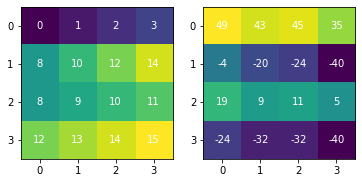

In [69]:
test_diff2_sol = np.array([[ 49,  43,  45,  35],
                           [ -4, -20, -24, -40],
                           [ 19,   9,  11,   5],
                           [-24, -32, -32, -40]])

fig, ax = plt.subplots(1, 2)

for i, arr in enumerate([test, test_diff2_sol]):
    im = ax[i].imshow(arr)
    # Loop over data dimensions and create text annotations.
    for j in range(4):
        for k in range(4):
            text = ax[i].text(k, j, arr[j, k],
                           ha="center", va="center", color="w")
plt.show()

### Zuguterletzt
Noch zwei Hinweise zur Implementierung bei der Schneeflocke
1. Wenden Sie die Diffusion auf das _unreceptive\_grid_ an. Also das _diffusion\_grid_ ist die zweite Ableitung mal alpha / 12 (siehe Punkt 2). Das addieren Sie dann am Ende auf das  _unreceptive\_grid_.
2. Skalieren Sie Ihre zweite Ableitung mit dem Faktor alpha / 12. Dabei ist alpha die Diffusionskonstante, die man variieren kann. Die 12 könnte man sich auch sparen, aber diese ist eine Art Norm und brauch man, wenn man mit Werten aus dem Paper vergleichen will.
